In [86]:
import pandas as pd
import matplotlib.pyplot as plt

Membaca file DataFrame.csv

In [87]:
lr = pd.read_csv(r'D:\temp\tubes2\harvardnobeldata\laureate.csv')

Cleansing Data

Data kotor: data nama negara yang masih merujuk nama pada tahun tertentu sebelum namanya seperti sekarang. Contoh: seorang laureate lahir di Polandia yang saat itu dikuasai Jerman, sehingga pada data dituliskan 'German-occupied Poland (now Poland)'
Data kotor diubah dengan nama negara yang mengikuti kondisi zaman sekarang

Data kotor: data hilang (NaN)
Data kotor ditangani dengan menghapus baris terkait

In [88]:
cntry_born = lr['bornCountry'].tolist()
for i in range(len(cntry_born)):
    if pd.isna(cntry_born[i]) == True:
        pass
    else:
        if 'now' in cntry_born[i]:
            cntry_born[i] = cntry_born[i].replace(')', '').replace('(', '')
            splt = cntry_born[i].split(' ')
            if splt[-2] == 'now':
                cntry_born[i] = splt[-1]
            else:
                cntry_born[i] = ' '.join(splt[splt.index('now') + 1:-1]) + ' ' + splt[-1]
lr['bornCountry'] = cntry_born
lr.loc[lr['country'] == 'Alsace (then Germany, now France)', 'country'] = 'France'; lr.loc[lr['country'] == 'Federal Republic of Germany', 'country'] = 'Germany'; lr.loc[lr['country'] == 'USSR', 'country'] = 'Russia'
lr = lr.dropna(subset=['bornCountry', 'country'])

Penambahan atribut baru 'age_at_prize' yaitu usia laureates saat menerima nobel prize

In [89]:
lr1 = lr.loc[(lr['born'] != '0000-00-00') & (lr['died'] != '0000-00-00')]
lr1['age_at_prize'] = lr1['year'] - lr1['born'].apply(lambda x: x.split('-')[0]).astype(float)

C:\Users\pradi\AppData\Local\Temp/ipykernel_10428/1682700397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr1['age_at_prize'] = lr1['year'] - lr1['born'].apply(lambda x: x.split('-')[0]).astype(float)


Visualisasi jumlah Nobel laureates yang merupakan imigran

Text(0, 0.5, 'Jumlah Laureates')

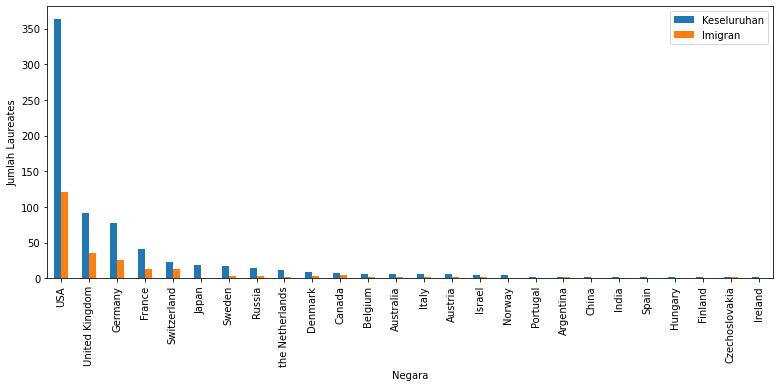

In [208]:
ctries = lr.groupby('country').size().sort_values(ascending=False).rename('Keseluruhan')
lr_imm = lr.loc[lr['bornCountry'] != lr['country']]
imm_cntry = lr_imm.groupby('country').size().sort_values(ascending=False).rename('Imigran')
df = pd.concat([ctries, imm_cntry], axis=1)
df.plot.bar(figsize=(13,5))
plt.xlabel('Negara'); plt.ylabel('Jumlah Laureates')

Visualisasi perbandingan jumlah laureates yang pernah mendapat satu kali penghargaan & yang lebih dari sekali

Text(0, 0.5, 'Total Penghargaan')

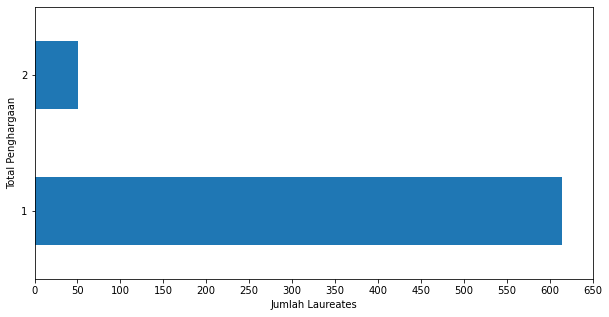

In [204]:
pog = lr[['born', 'surname']].value_counts()
pogdf = pog.to_frame().reset_index()
pogdf.rename(columns={0:'freq'}, inplace=True)
pogdf['freq'].value_counts().plot.barh(figsize=(10,5), xticks=range(0,700,50))
plt.xlabel('Jumlah Laureates'); plt.ylabel('Total Penghargaan')

Visualisasi perubahan jumlah laureates berdasarkan gender terhadap waktu

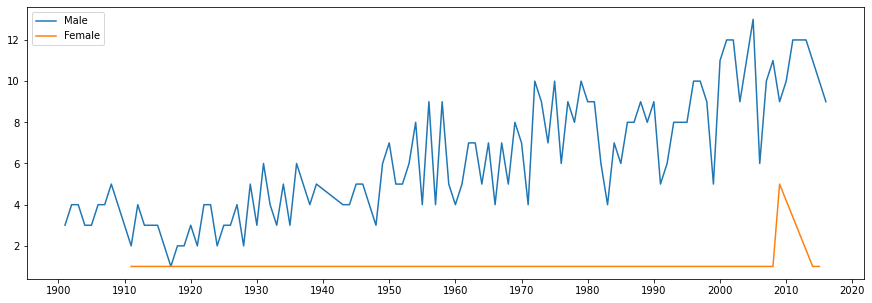

In [223]:
female = lr.loc[lr['gender'] == 'female'][['year']]
female = female['year'].value_counts().sort_index(ascending=True).rename('Female')
male = lr.loc[lr['gender'] == 'male'][['year']]
male = male['year'].value_counts().sort_index(ascending=True).rename('Male')
plt.figure(figsize=(15,5)); plt.xticks(range(1900,2030,10))
plt.plot(male); plt.plot(female)
plt.legend(['Male', 'Female'])